## PHYS 6260: Homework 4

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from gaussxw import gaussxwab
from scipy import constants

## Problem 1: Adaptive integration

Consider the integral:

$$I = \int_{0}^{1}\sin^2{\sqrt{100x}} \,dx $$

In [4]:
# function
def I(x):
    return (np.sin(np.sqrt(100*x)))**2

In [5]:
# integral limit
a = 0
b = 1
n1 = 1
accuracy = 0.000001

### Part (a)

This program uses the adaptive trapezoidal rule method to calculate the value of the above integral to an approximate accuracy of $\epsilon = 10^{-6}$. First, we choose a small number of step $N_1 = 1$ and evaluate the integral. Then, we double the number to $N_{i+1} = 2N_{i}$, evaluate the integral again using (5.34): 
$$I_i = \frac{1}{2}I_{i-1} + h_i\sum_{1...N_{i-1}}^{k_{odd}} f(a+kh_i) $$
and apply the equation (5.30) to calculate error:
$$\epsilon_i = \frac{1}{3}\times (I_i - I_{i-1})$$
The program also prints out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices N, until reaching the target accuracy. 

In [6]:
# regular trapezoidal rule method
# function accept the integral function, slice, lower and upper limit as variable
# return estimated integral
def trap(I,n):
    h = (b-a)/n
    integral = 0.5*I(a) + 0.5*I(b)
    for i in range(1,n):
        integral += I(a + i*h)
    return integral*h

In [8]:
# adaptive trapezoidal rule method
# function accept the integral function, previous number of slices and its estimate integral as variable
# calculate the new estimated integral with double slice and error
# compare error to the required accuracy
# if reach target return the slices number, otherwise continue calculate

def adap_trap(I,n,I1,accuracy):
    n2 = 2*n # double slices
    h2 = (b-a)/n2
    
    #using equation (5.34) to calculate new estimate integral
    I2 = 0.5*I1

    m = 0
    for l in range(1,n2,2):
        m += I(a + l*h2)
    I2 += h2*m
    
    #using equation (5.30) to calculate error
    error = 1/3 * (I2-I1)
    print("Number of slices: %i, estimate of the integral: I = %.7f, estimate of the error on the integral: %e" %(n2,I2,abs(error)))
    
    #compare to target accuracy
    if abs(error) < accuracy:
        return 'To reach the target accuracy, we need to use %i slices' %n2
    else:
        return adap_trap(I,n2,I2,accuracy)

In [9]:
I1 = trap(I,n1)
print("Initial slice: N = 1 has I = %.6f" %I1)
adap_trap(I,n1,I1,accuracy)

Initial slice: N = 1 has I = 0.147979
Number of slices: 2, estimate of the integral: I = 0.3252319, estimate of the error on the integral: 5.908414e-02
Number of slices: 4, estimate of the integral: I = 0.5122829, estimate of the error on the integral: 6.235031e-02
Number of slices: 8, estimate of the integral: I = 0.4029974, estimate of the error on the integral: 3.642847e-02
Number of slices: 16, estimate of the integral: I = 0.4301034, estimate of the error on the integral: 9.035307e-03
Number of slices: 32, estimate of the integral: I = 0.4484147, estimate of the error on the integral: 6.103765e-03
Number of slices: 64, estimate of the integral: I = 0.4539129, estimate of the error on the integral: 1.832755e-03
Number of slices: 128, estimate of the integral: I = 0.4553485, estimate of the error on the integral: 4.785244e-04
Number of slices: 256, estimate of the integral: I = 0.4557113, estimate of the error on the integral: 1.209207e-04
Number of slices: 512, estimate of the inte

'To reach the target accuracy, we need to use 4096 slices'

### Part (b)

Using the Romberg integration technique to calculate the same integral. This method reaches the required accuracy considerably faster than the trapezoidal rule alone.

In [10]:
# using the standard trapezoidal rule to calculate I1
R11 = trap(I,n1)
# create the Romberg triangular table
row = 1
table = [[]]
table[0].append(R11)

In [13]:
# function accept row, accuracy, table, step = slice as variables
# return the step needed to achieve target accuracy, otherwise continue calculate
def romberg(I,row,accuracy,table,step):
    row += 1
    column = 1
    step1 = 2*step
    # using the standard trapezoidal rule to calculate R[i][1] and add to table
    R_row1 = trap(I,step1)
    table.append([R_row1])
          
    # find the more accurate estimate using (5.51) and error using (5.49)
    # compare each error to desired accuracy to halt the program when reached
    while column < row:
        column += 1
        err = 1/(4**(column-1)-1) * (table[row-1][column-2] - table[row-2][column-2])
        if abs(err) < 0.000001:
            return "Reach the target accuracy at row = %i, column = %i, N = %d" %(row,column-1, step1)
        else:
            R_rc = err + table[row-1][column-2]
            table[row-1].append(R_rc)
    return romberg(I,row,accuracy,table,step1)

In [14]:
romberg(I,row,accuracy,table,n1)

'Reach the target accuracy at row = 7, column = 4, N = 64'

In [15]:
table
print('The triangular table of Romberg estimates of the integral until reach target accuracy:', *table, sep='\n')

The triangular table of Romberg estimates of the integral until reach target accuracy:
[0.147979484546652]
[0.3252319078064746, 0.38431604889308213, 0.38431604889308213]
[0.5122828507233315, 0.5746331650289505, 0.5873209727713417, 0.5746331650289505, 0.5873209727713417]
[0.40299744847824825, 0.3665689810632205, 0.35269803546550516, 0.34897386185747603, 0.3665689810632205, 0.35269803546550516, 0.34897386185747603]
[0.43010336929474696, 0.4391386762335799, 0.44397665591160385, 0.4454255229028118, 0.4458037647108327, 0.4391386762335799, 0.44397665591160385, 0.4454255229028118, 0.4458037647108327]
[0.4484146657874698, 0.4545184312850441, 0.45554374828847505, 0.45572735292937777, 0.4557677522628153, 0.4557774922310968, 0.4545184312850441, 0.45554374828847505, 0.45572735292937777, 0.4557677522628153, 0.4557774922310968]
[0.45391293121537596, 0.4557456863580113, 0.4558275033628758, 0.45583200741167584, 0.4557456863580113, 0.4558275033628758, 0.45583200741167584]
[0.3252319078064746]
[0.512282

<span style="color:red">Correct 10/10</span>

## Problem 2: Heat capacity of a solid

Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be
$$ C_V = 9V\rho k_B \left(\frac{T}{\theta_D}\right)^3 \int_{0}^{\theta_D/T}\frac{x^4 e^x}{(e^x - 1)^2} dx$$
where $V$ is the volume of the solid, $\rho$ is the number density of atoms, $k_b$ is Boltzmann's constant, and $\theta_D$ is the $Debye$ $temperature$, a property of solids that depends on their density and sound speed.

### Part (a)

In [17]:
# constants 
v = 0.001 # m^3 = 1000 cm^3
rho = 6.022*(10**28) # m^-3 
debye = 428 # K 
N = 50 # sample points

In [18]:
# function accept temperature as variable 
# using the given routines gaussxwab to calculate the integral
# return cv(T)
def cv(T):
    
    # calculate integral using  the routines in the file gaussxb.py on Canvas
    def f(x):
        return (x**4) * np.exp(x) / (np.exp(x)-1)**2
    a = 0
    b = debye/T
    
    x, w = gaussxwab(N,a,b)
    s = 0.0
    for k in range(N):
        s += w[k] * f(x[k])
        
    return 9*v*rho*constants.k * (T/debye)**3 * s

### Part (b)

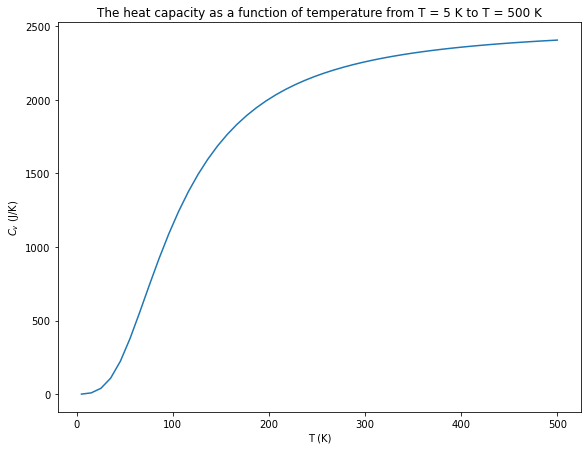

In [19]:
# use function cv(T) to make a graph of the heat capacity as a function of temperature from T = 5K to 500K
init_T = 5 # K
final_T = 500 # K

T_set = np.linspace(init_T, final_T, N)
cv_set = [] 
for temp in T_set: 
    cv_set.append(cv(temp))

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("T (K)")
ax.set_ylabel("$C_v$ (J/K)")
ax.set_title("The heat capacity as a function of temperature from T = 5 K to T = 500 K")

plt.plot(T_set, cv_set);

<span style="color:red">Correct 5/5</span>

## Problem 3: Wave diffraction

The wave will be diffracted at the edge, and the resulting intensity at the position (x,z) marked by the dot is given by near-filed diffraction theory to be 

$$I = \frac{I_0}{8}\{[2C(u) + 1]^2 + [2S(u) + 1]^2\} $$

where 

$$u = x\sqrt{\frac{2}{\lambda z}}, \qquad C(u) = \int_{0}^{u}\cos{\frac{\pi t^2}{2}}dt,  \qquad S(u) = \int_{0}^{u}\sin{\frac{\pi t^2}{2}}dt $$

In [20]:
# constants
wavelength = 1 # m
z = 3 # m from straight edge 
N = 50 # points 

In [21]:
def I_ratio(position):
    u = position * np.sqrt(2/(wavelength*z))
    
    # calculate integral using  the routines in the file gaussxb.py on Canvas
    def s(x):
        return np.sin(np.pi*x**2/2)
    def c(x):
        return np.cos(np.pi*x**2/2)
                      
    a = 0
    b = u
    
    x, w = gaussxwab(N,a,b)
    s1 = 0.0
    c1 = 0.0
    for k in range(N):
        s1 += w[k]*s(x[k])
        c1 += w[k]*c(x[k])
    
    return ((2*c1 + 1)**2 + (2*s1 + 1)**2) / 8

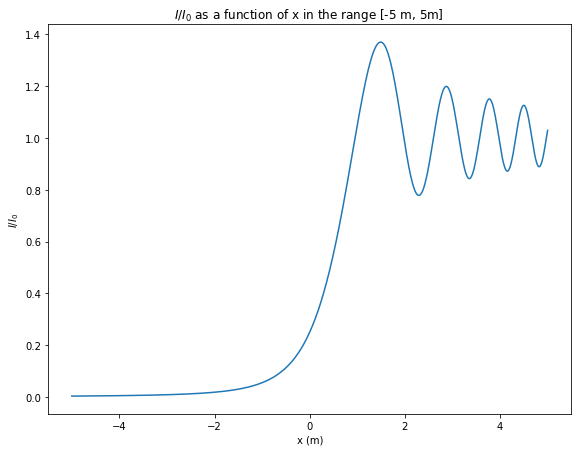

In [22]:
# use function I_ratio(x) to make a graph of the ratio as a function of x from x = -5 m to 5 m
init_x = -5 # m
final_x = 5 # m

x_set = np.linspace(init_x, final_x, 1000)
ratio_set = [] 
for x in x_set: 
    ratio_set.append(I_ratio(x))

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("x (m)")
ax.set_ylabel("$I/I_0$")
ax.set_title("$I/I_0$ as a function of x in the range [-5 m, 5m] ")

plt.plot(x_set, ratio_set);

<span style="color:red">Correct 5/5</span>

## Problem 4: The Stefan-Boltzmann constant

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $\omega$ to $\omega + d\omega$, a black body of unit area radiates electromagnetically an amount of thermal energy per second equal to $I(\omega)d\omega$, where 

$$I(\omega) = \frac{\hbar}{4\pi^2 c^2} \frac{\omega^3}{e^{\hbar \omega / k_B T} -1}$$

Here $\hbar$ is Planck's constant over 2$\pi$, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

### Part (a)

The total energy per unit area radiated by a blackbody is 
$$ W = \int_{0}^{\infty}I(\omega)d\omega = \int_{0}^{\infty}\frac{\hbar}{4\pi^2 c^2} \frac{\omega^3}{e^{\hbar \omega / k_B T} -1}d\omega$$
Let $x =\frac{\hbar \omega} {k_B T}$. Then,
$$\omega = \frac{xk_B T}{\hbar} \rightarrow d\omega = \frac{k_B T dx}{\hbar} $$

Substitute both into W. We have:

$$W = \int_{0}^{\infty}\frac{\hbar k_B^3 T^3}{4\pi^2 c^2 \hbar^3} \frac{x^3}{e^{x} -1}\frac{k_B T dx}{\hbar}$$

Or:

$$W = \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3}\int_{0}^{\infty}\frac{x^3}{(e^{x} -1)}dx$$


### Part (b)

For the above integral, it has an infinite range. So, I need to change variable to convert it back to finite range. Then, I would prefer using Gaussian quadrature since I don't need to worry about uniformly spacing data. And, I think it's faster, easier, and high accuracy too. 

Let $x = \frac{z}{1-z} \rightarrow dx = \frac{dz}{(1-z)^2}$. Then, the integral becomes:
$$\int_{0}^{\infty}\frac{x^3}{(e^{x} -1)}dx=\int_{0}^{1}\left(\frac{z}{1-z}\right)^3\frac{1}{e^{\frac{z}{1-z}}-1}\frac{dz}{(1-z)^2}$$


In [23]:
def h(z):
    return ((z**3)/(1-z)**5) * 1/(np.exp(z/(1-z))-1)

# calculate integral using  the routines in the file gaussxb.py on Canvas
lower_lim = 0
up_lim = 1
    
x1, w1 = gaussxwab(50,lower_lim,up_lim)
integral = 0.0

for l in range(50):
    integral += w1[l]*h(x1[l])
print(integral)

6.493939400514872


<ipython-input-23-681ba6cef868>:2: RuntimeWarning: overflow encountered in exp
  return ((z**3)/(1-z)**5) * 1/(np.exp(z/(1-z))-1)


### Part (c)

Even  before  Planck  gave  his  theory  of  thermal  radiation  around  the  turn of  the  20th  century,  it  was  known  that  the  total  energy $W$ given  off  by  a  blackbody  per unit area per second followed Stefan’s law: $W=\sigma_BT^4$, where $\sigma_B$ is the Stefan-Boltzmann constant.

In [24]:
constant = (constants.k**4 / (4*(np.pi**2)*(constants.c**2)*(constants.hbar**3))) * integral
error1 = abs(constant - constants.Stefan_Boltzmann)/100

print("The theory Stefan-Boltzmann constant is %s." %(constants.Stefan_Boltzmann))
print("Our calculated constant is %s." %(constant))
print("The percentage error is %s." %(error1))

The theory Stefan-Boltzmann constant is 5.670374419e-08.
Our calculated constant is 5.670374417654657e-08.
The percentage error is 1.3453430918684953e-19.


If we only consider three significant figures, my calculated constant is exactly the same as theory constant: $\sigma_B = 5.67\times 10^{-8}$

<span style="color:red">Correct 10/10</span>